
# 1-Gaussian Process for Classifcation(GPC):

In [26]:
# numpy to create our GP model for binaray-classifier
import numpy as np
from numpy.linalg import inv
# matplotlib for visualization of the results
import matplotlib.pyplot as plt
# BaseEstimator base all estimators of sklearn, we need his useful methods get_params() and set_params()
from sklearn.base import BaseEstimator 
# import the predefinit expite function (sigmoid) to transform the output of GP who lie in entire axis (ox)
#into probability that lie in [0,1]
from scipy.special import expit as sigmoid
# import the toy data 
from sklearn.datasets import make_moons
# import the common kernel from sklearn
from sklearn.metrics.pairwise import (linear_kernel, polynomial_kernel, 
                              sigmoid_kernel, rbf_kernel, chi2_kernel, cosine_similarity)
from sklearn.gaussian_process.kernels import RBF
# warnings to supress the warnings
import warnings
warnings.filterwarnings('ignore')

class GaussianProcessClassifier(BaseEstimator):
    
    def __init__(self, classification=True, regression=True, 
                 kernel=linear_kernel, noise_coiff=0.01, stab_calc=1e-8):
        self.classification=classification
        self.regression=regression
        self.noise_coff=noise_coiff
        self.kernel=kernel
        self.stab_calc=stab_calc
        
    def fit(self, X, t):
         #assert X.ndim>1
         if X.ndim==1:
                X=X[:,None]
         self.covariance=self.kernel(X,X)+np.identify(len(self.kernel(X,X)))*(self.noise+self.stab_calcu)
         # precision is the inverse-matrix of the covariance
         self.precision=inv(self.covariance)
        
    def predict(self, x):
        #assert X.ndim>1
        if x.ndim==1:
                x=x[:,None]
        a_mean=self.kernel(x, self.X)@self.precision@self.t
        return self.sigmoid(a_man)
        
       
GP= GaussianProcessClassifier()

         
     
   
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        

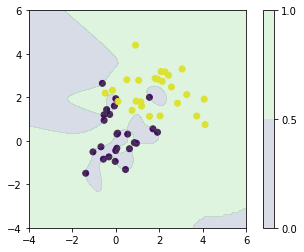

In [29]:
import numpy as np
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.metrics import accuracy_score
class GaussianProcessClassifier2:

    def __init__(self, kernel, noise_level=1e-4):
        """
        construct gaussian process classifier
        Parameters
        ----------
        kernel
            kernel function to be used to compute Gram matrix
        noise_level : float
            parameter to ensure the matrix to be positive
        """
        self.kernel = kernel
        self.noise_level = noise_level

    def _sigmoid(self, a):
        return np.tanh(a * 0.5) * 0.5 + 0.5

    def fit(self, X, t):
        if X.ndim == 1:
            X = X[:, None]
        self.X = X
        self.t = t
        Gram = self.kernel(X, X)
        self.covariance = Gram + np.eye(len(Gram)) * self.noise_level
        self.precision = np.linalg.inv(self.covariance)

    def predict(self, X):
        if X.ndim == 1:
            X = X[:, None]
        K = self.kernel(X, self.X)
        a_mean = K @ self.precision @ self.t
        return self._sigmoid(a_mean).reshape(1, X.shape[0])
    
    #def predict(self,x):
       # return [self.predict_(X) for X in x].asarray(())

class GaussianProcessClassier1(BaseEstimator):
    
    def __init__(self,kernel, noise_level=1e-4):
        self.kernel = kernel
        self.noise_level = noise_level
        
    def fit(self, X, y):
        kernel=RBF(length_scale=[1./X.shape[1] for i in range(X.shape[1])])
        self.model=GaussianProcessClassifier2(kernel, self.noise_level)
        self.model.fit(X, y)
        
    def predict(self, x):
        return self.model.predict(x)




def create_toy_data():
    x0 = np.random.normal(size=50).reshape(-1, 2)
    x1 = np.random.normal(size=50).reshape(-1, 2) + 2.
    return np.concatenate([x0, x1]), np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)[:, None]

x_train, y_train = create_toy_data()
x0, x1 = np.meshgrid(np.linspace(-4, 6, 100), np.linspace(-4, 6, 100))
x = np.array([x0, x1]).reshape(2, -1).T

model = GaussianProcessClassier1(RBF(np.array([1., 7., 7.])))
model.fit(x_train, y_train)
y = model.predict(x)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train.ravel())
plt.contourf(x0, x1, y.reshape(100,100), levels=np.linspace(0,1,3), alpha=0.2)
plt.colorbar()
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.gca().set_aspect('equal', adjustable='box')





# Work with a real problem of classification:


In [3]:
from sklearn.metrics import accuracy_score
import pandas as pd
from zipfile import ZipFile

zip_file = ZipFile('/home/said/Downloads/archive(3).zip')
dfs = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename))
       for text_file in zip_file.infolist()
       if text_file.filename.endswith('.csv')}
#df1=dfs['penguins_lter.csv']
#df2=dfs['penguins_size.csv']
#n=int(input('Entre THe Number of csv file')) jupyter notebook doesn't support that input
#assert n<len(dfs)
dfn=dfs[list(dfs.keys())[1]]
dfn.head()
#dfn.head(50)
#df2['species'].value_counts()
#df2['island'].value_counts()
#df2['sex'].value_counts()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
# we have some missing data so we drop out the NaN
df2.dropna(inplace=True)
# our target here is derminate the sex of the penguin after given features

# some values in the DataFrame are not numerical so encoded them
df2['species'].value_counts()
df2['island'].value_counts()
values_codes={'species':{'Adelie':1,'Gentoo':2, 'Chinstrap':3},
             'island':{'Biscoe':1, 'Dream':2,'Torgersen':3},
             'sex':{'FEMALE':1, 'MALE':2, '.':3}}
df2=df2.replace(values_codes)
df2.head(50)

In [95]:

# the binary classification with GPC of sklearn
from sklearn.gaussian_process import GaussianProcessClassifier
# splitting the data
from sklearn.model_selection import train_test_split
X=df2.drop('sex', axis='columns')
y=df2['sex']
from numpy.random import seed
seed(42)
x_train, x_test, y_train, y_test=train_test_split(X, y)
from sklearn.metrics import accuracy_score
model=GaussianProcessClassifier()
x_train, y_train=x_train.to_numpy(), y_train.to_numpy()
x_train=x_train.astype(np.float)
x_train
y_train
#y_train=y_train.astype(np.float)
model.fit(x_train, y_train) 
y_pred=model.predict(x_test)
accuracy_score(y_pred, y_test)
model.score(x_test, y_test)
# Now let's test performance of our model
our_model=GP#GaussianProcessClassier1(RBF(np.array([1., 7., 7.])))
our_model.fit(x_train, y_train)
y_pred=our_model.predict(x_test)
y_pred.reshape(84,1)
y_test=y_test.to_numpy().reshape(84,1)
y_pred=y_pred.reshape(84,1)
#
#accuracy_score(y_test, y_pred)
# our model doesn't work even in a single data point
y_pred


AttributeError: module 'numpy' has no attribute 'identify'

# Gaussian Process for Regression(GPR):

(-3.0, 3.0)

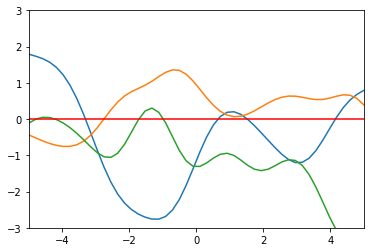

In [4]:
import matplotlib.pyplot as plt
from sklearn.gaussian_process import kernels, GaussianProcessRegressor
import numpy as np
# prior

def kernel(x1, x2, l=1., sigma=1.):
    d=(x1-x2.T)**2
    return sigma*np.exp(-d/2*l**2)
np.random.seed(0)
n=50
x_test=np.linspace(-5,5,n).reshape(-1,1)
mu=np.zeros((50,1))
cov=kernel(x_test, x_test)
prior_samples=np.random.multivariate_normal(mu.reshape(-1), cov, 3)
prior_samples_moy=prior_samples.mean()*np.ones(x_test.shape)
plt.plot(x_test, prior_samples.T)
plt.plot(x_test, mu, c='red')
plt.xlim(-5,5)
plt.ylim(-3,3)


## The Posterior(without noise):

(5, 5) (5, 50) (50, 50) (5, 5)


(-3.0, 3.0)

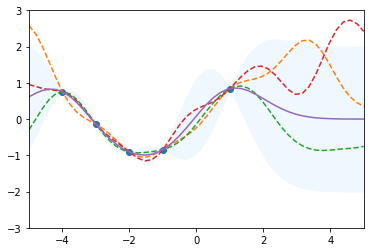

In [2]:
np.random.seed(0)
x_train=np.array([-4,-3,-2,-1,1]).reshape(-1,1)
y_train=np.sin(x_train)
noise=1e-8
# the posterior
k=kernel(x_train, x_train)
k_s=kernel(x_train, x_test)
k_ss=kernel(x_test,x_test)
k_inv=np.linalg.inv(k)
print(k.shape, k_s.shape, k_ss.shape, k_inv.shape)
# mean of posterior
mu_post=k_s.T.dot(k_inv).dot(y_train)
# the covariance of the posterior
cov_post=k_ss-k_s.T@(k_inv).dot(k_s)
sd=np.sqrt(np.diag(cov_post)).reshape(mu_post.shape)
# draw posterior samples:
posterior_samples=np.random.multivariate_normal(mu_post.ravel(), cov_post,3)
posterior_samples.shape
# plots 
plt.plot(x_train, y_train, 'o')
plt.plot(x_test, posterior_samples.T, '--')
plt.gca().fill_between(np.squeeze(x_test), np.squeeze(mu_post-2*sd), 
                       np.squeeze(mu_post+2*sd), color='aliceblue')
plt.plot(x_test, mu_post)
plt.xlim(-5,5)
plt.ylim(-3,3)

















## Posterior using L and necholesky(without noise):


(5, 1) (5, 1)
(50, 1) (50, 3)


(-3.0, 3.0)

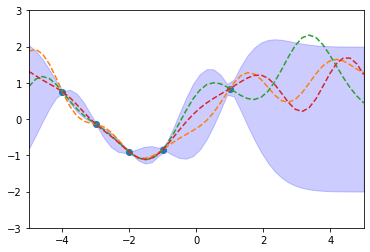

In [9]:
np.random.seed(0)
N=50
# Data
x_train=np.array([-4,-3,-2,-1,1]).reshape(-1,1)
y_train=np.sin(x_train)
x_test=np.linspace(-5,5,n).reshape(-1,1)
N=len(x_train)
print(x_train.shape, y_train.shape)
# Train
k=kernel(x_train, x_train)
L=np.linalg.cholesky(k)
# test
ks=kernel(x_train, x_test)
ls=np.linalg.solve(L, ks)
mu=np.dot(ls.T, np.linalg.solve(L, y_train))
## test the variance
kss=kernel(x_test, x_test)
sd=np.sqrt(np.diag((kss-np.sum(ls**2, axis=0)))).reshape(mu.shape)
# samples:
print(x_test.shape, posterior_samples.shape)
L=np.linalg.cholesky(kss+1e-6*np.eye(n)-np.dot(ls.T, ls))
posterior_samples=mu.reshape(-1,1)+np.dot(L, np.random.normal(size=(n,3)))
plt.plot(x_train, y_train, 'o')
plt.plot(x_test, posterior_samples, '--')

plt.gca().fill_between(np.squeeze(x_test), np.squeeze(mu-2*sd), 
                       np.squeeze(mu+2*sd), color='blue', alpha=0.2)

plt.xlim(-5,5)
plt.ylim(-3,3)

## Scikit-Learn

In [1]:
from sklearn.gaussian_process import kernels
np.random.seed(0)
n=50
kernel_=[kernels.RBF(), kernels.RationalQuadratic(), kernels.ExpSineSquared(periodicity=10.)
         ,kernels.DotProduct(sigma_0=1.)**2, kernels.Matern()]
for kernel in kernel_:
    # gaussian Process
    gp=GaussianProcessRegressor(kernel=kernel)
    # prior
    x_test=np.linspace(-5,5,n).reshape(-1,1)
    mu_prior,std_prior=gp.predict(x_test, return_std=True)
    samples_prior=gp.sample_y(x_test, 3)
    print('#'*50)
    print(kernel)
    print('#'*50)
    # plot
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    plt.plot(x_test, mu_prior)
    plt.fill_between(x_test.ravel(), mu_prior-2*std_prior, mu_prior+2*std_prior, color='blue', alpha=0.2)
    plt.plot(x_test, samples_prior)
    plt.title('Prior')
    # Fit
    x_train=np.array([-4,-3,-2,-1,1]).reshape(-1,1)
    y_train=np.sin(x_train)
    # posterior
    gp.fit(x_train,y_train)
    mu_post, std_post=gp.predict(x_test, return_std=True)
    mu_post=mu_post.reshape(-1)
    samples_post=gp.sample_y(x_test, 3)
    # plot
    #plt.figure(figsize=(10,3))
    plt.subplot(1,2,2)
    plt.plot(x_test, mu_post)
    plt.fill_between(x_test.ravel(), mu_post-2*std_post, mu_post+2*std_post, color='blue', alpha=0.2)
    plt.plot(x_test, samples_post)
    plt.title('Posterior')
                                       

NameError: name 'np' is not defined

## Linear Regression(Poly)

In [12]:
from sklearn import linear_model
from sklearn import preprocessing

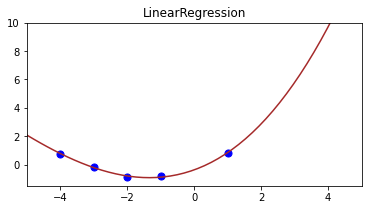

In [30]:
n=50
x_train=np.array([-4,-3,-2,-1,1]).reshape(-1,1)
y_train=np.sin(x_train)
x_test=np.linspace(-5,5,n).reshape(-1,1)
#Poly
poly=preprocessing.PolynomialFeatures(degree=3)
poly.fit(x_train)
x_train_poly=poly.transform(x_train)
y_train_poly=poly.transform(y_train)
x_test_poly=poly.transform(x_test)
reg=linear_model.LinearRegression()
reg.fit(x_train_poly, y_train)
y_pred=reg.predict(x_test_poly)
fig=plt.figure(figsize=(6,3))
plt.scatter(x_train, y_train, c='blue', s=50)
plt.plot(x_test, y_pred, c='brown')
plt.xlim(-5,5)
plt.ylim(-1.5,10)
plt.title('LinearRegression')
plt.show()




## Work With A Real Data:


In [33]:
from sklearn.metrics import accuracy_score
import pandas as pd

df=pd.read_csv('/home/said/Downloads/archive(4).zip')
df.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## Preparation Of Data:


what we need from this data. 
we are try to figure out is there any relationship between the Precip Type and other features.
so first, 
1-we exploring the data .
2-cleaning the data (get rid off or replace the undesired columns, missing-value, ...etc)
4-visualization of data 
3-prediction of the Precipe Type we our GPR compare it with other algorithms in sklearn GaussianProcessRegressor,
Naive_bayes, Decision_Tree, Random_Forest ... 
4-Tuning Parameters
5-Regularization

## 1-Exploration Of Data:


In [51]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [2]:
df.describe()

NameError: name 'df' is not defined

all value of the column Loud Cover are identical, so we get rid of this columns.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator
import pandas as pd
def kernel(x1, x2, l=1., sigma=1.):
    d=(x1-x2.T)**2
    return sigma*np.exp(-d/2*l**2)
np.random.seed(0)
class GaussianProcessRegressor(BaseEstimator):
    
    def __init__(self, kernel=kernel, level_nose=10-7):
        self.kernel=kernel()
        self.level_noise=level_noise
    
    def get_rid_off_warnings(self):
        import warnings
        warnings.filterwarnings('ignore')
    
    def toy_data(self):
        ''' create a toy data '''
    
    def prior(self, prior_samples, n_prior_sample=5, with_visualization=True):
    
    
    
    def fit(self, X, y):
        
        
        
    def posterior(self,prior_samples, n_prior_sample=5, with_visualization=True):
        
    def predict(self, x_test, with_regularization=False, active_PCA=True):
        
class preparation_data:
    
    def __init__(self, file_name, multiple_csv_file=False):
        self.file_name=file_name
        self.multille_csv_file=multille_csv_file
        
    def exploring_data(self, number_samples=5, describe_data=False,data_information=False, number_csv_file=None ):
        if is not self.multiple_csv_file:
           DataFrame=pd.read_csv(self.file_name)
           DataFrame.head(number_samples)
           if describe_data:
               DataFrame.describe()
           if data_information:
               DataFrame.info()
        else:
            ''' use dictionaries '''
            from zipfile import ZipFile
            zip_file = ZipFile('/home/said/Downloads/archive(3).zip')
            dfs = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename))
                 for text_file in zip_file.infolist() if text_file.filename.endswith('.csv')}
            #n=int(input('Entre THe Number of csv file')) unfortunatel jupter doesn't support that
            assert number_csv_file<len(dfs)-1:
            dfn=dfs[list(dfs.keys())[number_csv_file]]
            assert n<len(dfs):
            dfn=dfs[list(dfs.keys())[n]]
            dfn.head(number_samples)
            
    def handle_missing_data(self, get_rid_off=True, replace_data_with=False):
        if get_rid_off:
            
        
        
    def Encodage_data(self):
        list=[self.DataFrame[].value_counts()]
    
    
    def normalize_data(self):
        
    def standarization_data(self):
        
        
        
        
            
        
            
        
        
    
   
        


        
    
        

IndentationError: expected an indented block after function definition on line 22 (2124115288.py, line 26)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator
import pandas as pd

def kernel(x1, x2, l=1., sigma=1.):
    d=(x1-x2.T)**2
    return sigma*np.exp(-d/2*l**2)
np.random.seed(0)

class ourGaussianProcessRegressor(BaseEstimator):
    
    def __init__(self, kernel, level_noise=10-20):
        self.kernel=kernel
        self.level_noise=level_noise
    
    def get_rid_off_warnings(self):
        import warnings
        warnings.filterwarnings('ignore')
    
    def toy_data(self):
        ''' create a toy data '''
        x_=np.array(np.arange(-5,5,0.1)).reshape(-1,1)
        y_=np.sin(x_) 
        return x_,y_
        
    def prior(self, prior_samples=None, n_prior_samples=3, with_visualization=True, visualise_interval_confidence=False):
        x_=self.toy_data()[0]
        cov=kernel(x_, x_)
        mu=np.zeros(x_.shape)
        np.random.seed(0)
        prior_samples=np.random.multivariate_normal(mu.reshape(-1), cov, n_prior_samples)
        print (prior_samples.mean())
        mean_prior=prior_samples.mean()*np.ones(x_.shape)
        if with_visualization:
           import matplotlib.pyplot as plt
           #plt.plot(x_, mu, color='red')
           plt.plot(x_, prior_samples.T)
           plt.plot(x_, mean_prior, color='black')
           plt.title('Prior Distribution')
           plt.show()
           plt.close()
           if visualise_interval_confidence:
              print('good')
               #std=np.sqrt(np.diag(cov)**2)/len(cov)
               #plt.fill_between(mu, mu-std*np.one)
        return mean_prior
    
    def posterior(self,x_target1=np.array(np.arange(-5,5,0.1)).reshape(-1,1),
                  x_train1=np.array([-4,-3,-2,-1,1]).reshape(-1,1),y_train ,with_visualization=True,with_interval_confidence=False, regurilization=True, number_samples=5):
        #np.random.seed(0)
        '''
        x_target1, x_train1,y_train1=None, None, None
        if (x_target==None , x_train==None , y_train==None).any():
              (x_target1==np.array(np.arange(-5,5,0.1)).reshape(-1,1)).all()
              (x_train1==np.array([-4,-3,-2,-1,1]).reshape(-1,1)).all()
              (y_train1==np.sin(x_train1).reshape(-1,1)).all()
        else:
            x_target1==x_target and x_train1==x_train and y_train1==x_train
        #x_target=np.linspace(-5,5,50).reshape(-1,1)
        '''
        C_N=self.kernel(x_train1, x_train1)+self.level_noise*np.identity(x_train1.shape[0])*0.00001
        inv_C_N=np.linalg.inv(C_N)
        c=kernel(x_target1, x_target1)+self.level_noise*0.0000001
        K=kernel(x_train1, x_target1)
        mean_target=K.T@inv_C_N@y_train
        covariance_target=c-K.T@inv_C_N@K
        posterior_samples=np.random.multivariate_normal(mean_target.ravel(), covariance_target,number_samples)
        if with_visualization:
            import matplotlib.pyplot as plt
            plt.plot(x_train1, y_train1, 'o')
            plt.plot(x_target, mean_target, c='blue')
            plt.plot(x_target1, posterior_samples.T, '--')
            plt.title('Posterior Distribution')
            plt.show()
            plt.close()
            #axis[1,0].xlim(-4,4)
            #axis[1,0].ylim(-3,3)
        return mean_target,covariance_target 
    
    def predict(self, x_target, with_error=False):
        if with_error:
            mean, std=self.posterior(x_target)[0], np.sqrt(self.posterior(x_target)[1])
            return mean, std
        else:
            return mean
            
            
GPR=ourGaussianProcessRegressor(kernel=kernel)
GPR.get_rid_off_warnings()
GPR.prior()
x_train=np.array([-4,-3,-2,-1,1]).reshape(-1,1),
y_train=np.sin(x_train).reshape(-1,1) 
x_target=np.array(np.arange(-5,5,0.1)).reshape(-1,1)
GPR.posterior(x_target,x_train,y_train,number_samples=3)


SyntaxError: non-default argument follows default argument (564442846.py, line 50)

## Learning The Heyparameters:


certainly , the perform of our model is dependent of the good choice of the hyperameters(family of functions in the case of GPR).

such technique a based on optimizing the likelihood function $p(t $/$ \theta)$

In [ ]:
# Here We Put THe code Learning The Hyperameters (book PRML of C.Bishop 2006 chapter 6)

## Working With Real Data:


In [1]:
from sklearn.metrics import accuracy_score
import pandas as pd

df=pd.read_csv('/home/said/Downloads/archive(4).zip')
print(df.shape)
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/home/said/Downloads/archive(4).zip'

## Problem: is there a relation between Humidity and Temperature:

we try to figure out is humidity related (somehow) by the tempurature:

what we need from this data. 

we are try to figure out is there any relationship between the humidity and tempurature.

so first:

1-we exploring the data.

2-cleaning the data (get rid off or replace the undesired columns, missing-value, ...etc)

4-visualization of data 

3-prediction of the Precipe Type we our GPR compare it with other algorithms in sklearn GaussianProcessRegressor,
Naive_bayes, Decision_Tree, Random_Forest ... 

4-Tuning Parameters

5-Regularization

we begin by creating a class can prepare automatically(at lest reduce manuality process)


In [58]:
class data_preparation:
    
    def __init__(self, file_name='/home/said/Downloads/archive(3).zip', multiple_csv_file=False):
        self.file_name=file_name
        self.multille_csv_file=multiple_csv_file
        
    def exploring_data(self, number_samples=5, describe_data=False,data_information=False, number_csv_file=None ):
        if not self.multiple_csv_file:
           DataFrame=pd.read_csv(self.file_name)
           DataFrame.head(number_samples)
           if describe_data:
               DataFrame.describe()
           if data_information:
               DataFrame.info()
        else:
            ''' use dictionaries '''
            from zipfile import ZipFile
            zip_file = ZipFile(file_name)
            dfs = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename))
                 for text_file in zip_file.infolist() if text_file.filename.endswith('.csv')}
            #n=int(input('Entre THe Number of csv file')) unfortunatel jupter notebook doesn't support that
            assert number_csv_file<len(dfs)-1
            dfn=dfs[list(dfs.keys())[number_csv_file]]
            assert n<len(dfs)
            dfn=dfs[list(dfs.keys())[n]]
            dfn.head(number_samples)
DP=data_preparation()
DP.exploring_data()
            
    

AttributeError: 'data_preparation' object has no attribute 'multiple_csv_file'

In [7]:
from sklearn.metrics import accuracy_score
import pandas as pd

df=pd.read_csv('/home/said/Downloads/archive(4).zip')
print(df.shape)
df1=df[:1000]
df1


(96453, 12)


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2006-08-02 11:00:00.000 +0200,Mostly Cloudy,rain,23.533333,23.533333,0.71,16.1805,318.0,11.3988,0.0,1009.38,Mostly cloudy throughout the day.
996,2006-08-02 12:00:00.000 +0200,Mostly Cloudy,rain,23.844444,23.844444,0.69,14.2646,301.0,11.2700,0.0,1009.41,Mostly cloudy throughout the day.
997,2006-08-02 13:00:00.000 +0200,Partly Cloudy,rain,24.955556,24.955556,0.62,12.7190,318.0,11.2700,0.0,1009.02,Mostly cloudy throughout the day.
998,2006-08-02 14:00:00.000 +0200,Partly Cloudy,rain,25.922222,25.922222,0.58,10.7065,295.0,11.4471,0.0,1009.00,Mostly cloudy throughout the day.


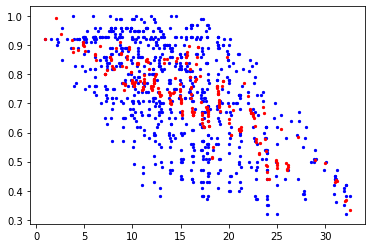

In [8]:
import numpy as np
y,x=df1['Humidity'], df1['Temperature (C)']
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
x_train, x_test, y_train, y_test=train_test_split(x,y)
x_train,x_test= np.array(x_train),np.array(x_test)
y_train,y_test=np.array(y_train),np.array(y_test)

GPR=GaussianProcessRegressor()
GPR.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))
GPR.predict(x_test.reshape(-1,1))
x_train.dtype, y_train.dtype
x=np.array([-4,-3,-1,1]).reshape(-1,1)
GPR.sample_y(x)
y=np.sin(np.array([-4,-3,-1,1]).reshape(-1,1))
GPR.fit(x_train.reshape(-1,1), y_train.reshape(-1,1))
y_pred=GPR.predict(x_test.reshape(-1,1))
plt.scatter(x_train,y_train,s=5,c='blue')#alpha=0.5)
plt.scatter(x_test,y_pred, c='red' ,s=5)
plt.show()
# 

In [ ]:
# now let's test our model

In [9]:
GPR=ourGaussianProcessRegressor(kernel=kernel)
GPR.posterior(x_train.reshape(-1,1), y_train.reshape(-1,1))
y_pred=GPR.predict(x_test.reshape(-1,1))
plt.scatter(x_train,y_train,s=5,c='blue')#alpha=0.5)
plt.scatter(x_test,y_pred, c='red' ,s=5)
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()